In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider
from IPython.display import display
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['figure.subplot.hspace'] = 0.4

# Generate a BPSK random variable with Gaussian noise

In [2]:
theta = np.random.randint(2)
theta

0

In [3]:
sigma_nu = 1
x = theta + sigma_nu * np.random.randn()
x

0.9688619456311094

# Display the PDFs

The conditional probability density function (PDF) is given by:
\begin{align}
p_{x|\theta}(x|\theta) &= \frac{1}{\sqrt{2\pi\sigma_\nu^2}} \mathrm e^{-\frac{(x-\theta)^2}{2\sigma_\nu^2}}
\end{align}

The marginal distribution $p(x)$ is then given by:
\begin{align}
p_{x|\theta}(x|\theta) &= p_\theta(\theta=-1) p_{x|\theta}(x|\theta=-1) + p_\theta(\theta=1) p_{x|\theta}(x|\theta=1)
\end{align}

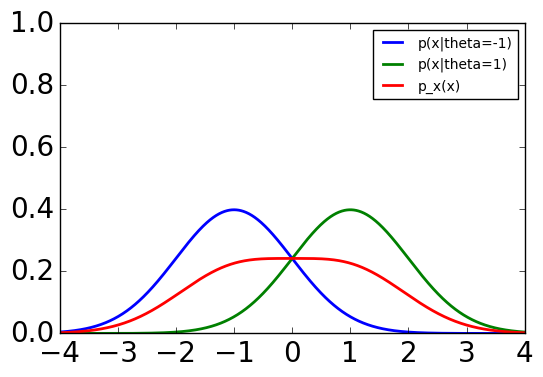

In [4]:
def p_x_given_theta(x, theta):
    return np.exp(-(x - theta)**2 / (2 * sigma_nu**2)) / np.sqrt(2 * np.pi * sigma_nu**2)

x = np.linspace(-4, 4, 1000)

p_x = np.zeros_like(x)
for theta in (-1, 1):
    y = p_x_given_theta(x, theta)
    p_x += 0.5 * y
    plt.plot(x, y, label='p(x|theta={})'.format(theta))

plt.plot(x, p_x, label='p_x(x)'.format(theta))

plt.xlim([-4, 4])
plt.ylim([0, 1])
plt.legend()
plt.show()

# Display the PDFs interactively

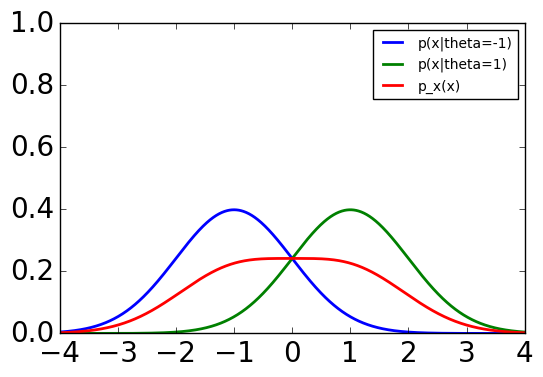

In [5]:
@interact(sigma_nu=FloatSlider(min=0.4, max=2., step = 0.2, value = 1))
def plot_pdfs(sigma_nu):
    def p_x_given_theta(x, theta):
        return np.exp(-(x - theta)**2 / (2 * sigma_nu**2)) / np.sqrt(2 * np.pi * sigma_nu**2)

    x = np.linspace(-4, 4, 1000)

    p_x = np.zeros_like(x)
    for theta in (-1, 1):
        y = p_x_given_theta(x, theta)
        p_x += 0.5 * y
        plt.plot(x, y, label='p(x|theta={})'.format(theta))

    plt.plot(x, p_x, label='p_x(x)'.format(theta))
    
    plt.xlim([-4, 4])
    plt.ylim([0, 1])

    plt.legend()
    plt.show()